In [200]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd

import bottleneck as bn
import numexpr as ne
import numba as nb

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



sns.set()
sns.set_style("dark")

In [201]:
from sklearn.datasets import make_regression,make_classification,load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error,f1_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor,SGDClassifier
from sklearn.svm import SVC,SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer

In [202]:
import xgboost as xgd

Dataset:

House dataset Heart Failure Prediction- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Predict the house prices in India

| Column | Description  |
| --- | --- |
| age | Age|
| anaemia | Decrease of red blood cells or hemoglobin (boolean)|
| creatinine_phosphokinase | Level of the CPK enzyme in the blood (mcg/L)|
| diabetes | If the patient has diabetes (boolean)|
| ejection_fraction | Percentage of blood leaving the heart at each contraction (percentage)|
| high_blood_pressure | If the patient has hypertension (boolean)|
| platelets | Platelets in the blood (kiloplatelets/mL)|
| serum_creatinine | Level of serum creatinine in the blood (mg/dL)|
| serum_sodium | Level of serum sodium in the blood (mEq/L)|
| sex | Woman or man (binary)|
| smoking | If the patient smokes or not (boolean)|
| time | Follow|up period (days)|
| DEATH_EVENT | If the patient deceased during the follow|up period (boolean)|

In [203]:

df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

Выведем первые 5 записей датасета.

In [204]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Отобразим информацию о типах данных и нулевых значениях.

Нулевых значений нет, не придется заполнить их.

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



Выведем основные статистики по столбцам.

In [206]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


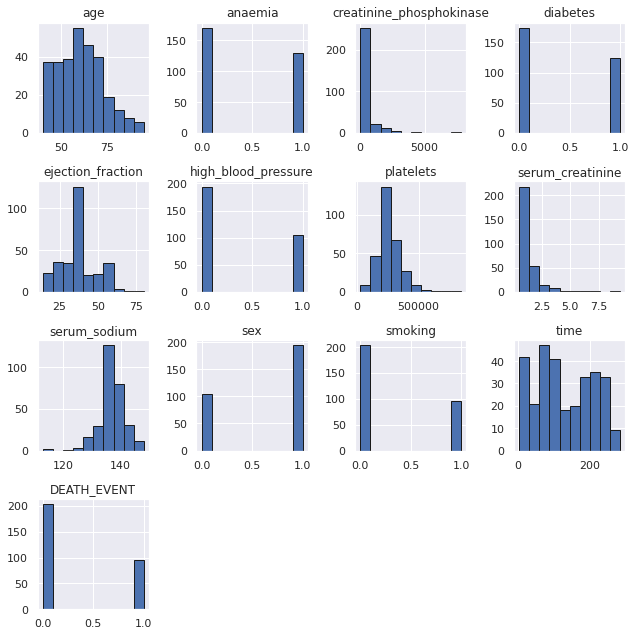

In [207]:
df.hist(figsize=(9,9),ec='k')
plt.tight_layout()

Гистограмма выглядит нормально, дисбаланса не наблюдается

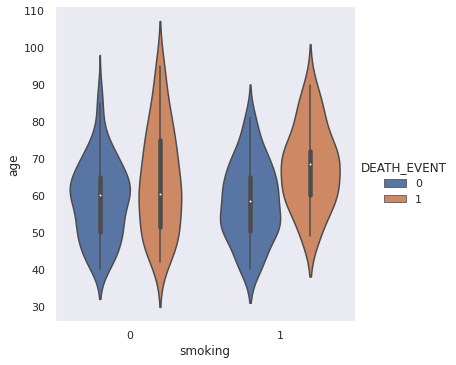

In [208]:
sns.catplot(data=df, kind="violin", x="smoking", y="age", hue="DEATH_EVENT")

Как видно на графике, курение повышает риск умереть от сердечно-сосудистых заболеваний.

Построим сводную таблицу по возрасту, полу и смерти.
Как видно, с увеличением возраста резко растет смертность.

In [209]:
ages=pd.cut(df['age'],[45,60,80,100])
df['ages']=ages
df.pivot_table('DEATH_EVENT','ages','sex')

sex,0,1
ages,,
"(45, 60]",0.404255,0.230769
"(60, 80]",0.268293,0.358974
"(80, 100]",0.600000,0.769231


Так как серьезной несбалансированности не наблюдается, то можно применить в качестве метрики accuracy

Разделим датасет на обучающуюся и тестовую выборки

In [210]:
x = df.drop(['DEATH_EVENT','ages'],axis=1)
y = df['DEATH_EVENT']

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True)

Обучим модель линейного стохастического градиента и выведем ее точность на тестовых данных.

In [212]:
model = SGDClassifier()
model.fit(x_train,y_train)
y_model = model.predict(x_test)

accuracy_score(y_test,y_model)

0.7333333333333333

Точность составляет 73%

Применим метод ближайших соседей и подберем оптимальный параметр количества соседей.

Точность по-умолчанию

In [213]:
# model2=KNeighborsClassifier(algorithm='kd_tree')
model2=make_pipeline(StandardScaler(),KNeighborsClassifier(algorithm='kd_tree',weights='distance'))
model2.fit(x_train,y_train)
y_model2=model2.predict(x_test)
accuracy_score(y_test,y_model2)

0.8133333333333334

n итерация

In [214]:
m=np.empty(x_train.shape[0])
for i in range(1,m.shape[0]):
    if i % 20 ==0:
        print(i)
    model2.set_params(kneighborsclassifier__n_neighbors=i)
    y_model2=model2.predict(x_test)
    m[i]=accuracy_score(y_test,y_model2)


20
40
60
80
100
120
140
160
180
200
220


График точности от количества соседей

Text(0, 0.5, 'accurcy')

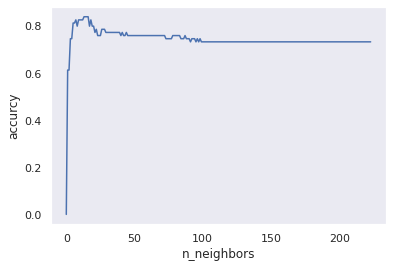

In [215]:
plt.plot(np.arange(m.shape[0]),m)
plt.xlabel('n_neighbors')
plt.ylabel('accurcy')

Выеберем такое количество соседей, чтобы соблюсти баланс между их количествоим и точностью

In [216]:
ai = np.argmax(m)
a=m[ai]

print(ai,a)

13 0.84


In [217]:
error=0.02
ali=np.where(m>=(a-error))[0][0]
al=m[ai]
print(ali,al)


7 0.84


13 соседей оптимальный вариант - 78% точность

Обучим модель метода опорных векторов, добавив полиномиальные признаки

In [218]:

model3= make_pipeline(PolynomialFeatures(2),SVC(kernel='sigmoid'))

model3.fit(x_train,y_train)
y_model3=model3.predict(x_test)
accuracy_score(y_test,y_model3)

0.7333333333333333

Точность 69%

In [219]:
x.to_numpy().dtype

dtype('float64')

В качестве дополнительного метода применим градиентный бустинг после выбора важных признаков ансамблем деревьев,
когда обучается много переобученных деревьев и берется среднее значение для предсказания.

In [220]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
# model3= GradientBoostingClassifier()
param = {
    # 'booster': 'dart',
         'max_depth': 4, 'learning_rate': 0.015,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}
model3_preprocess=make_pipeline(ColumnTransformer([("standart_scale", StandardScaler(),
                                         ['platelets',"creatinine_phosphokinase",
                                          "ejection_fraction","serum_creatinine","serum_sodium"]),],
                                       remainder='passthrough'),
                                # PolynomialFeatures(degree=3),
                                PolynomialFeatures(interaction_only=True),
                                SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=50)),
                      # GradientBoostingClassifier(),

                     )
x_train3=model3_preprocess.fit_transform(x_train,y_train)
x_test3=model3_preprocess.transform(x_test)





model3=xgd.XGBClassifier(use_label_encoder=False)
eval_set = [(x_test3, y_test)]
model3.fit(x_train3,y_train, eval_metric="error", eval_set=eval_set, verbose=5)

y_model3=model3.predict(x_test3)
accuracy_score(y_test,y_model3)



[0]	validation_0-error:0.18667
[5]	validation_0-error:0.09333
[10]	validation_0-error:0.08000
[15]	validation_0-error:0.08000
[20]	validation_0-error:0.08000
[25]	validation_0-error:0.08000
[30]	validation_0-error:0.08000
[35]	validation_0-error:0.08000
[40]	validation_0-error:0.08000
[45]	validation_0-error:0.08000
[50]	validation_0-error:0.08000
[55]	validation_0-error:0.08000
[60]	validation_0-error:0.08000
[65]	validation_0-error:0.08000
[70]	validation_0-error:0.08000
[75]	validation_0-error:0.09333
[80]	validation_0-error:0.09333
[85]	validation_0-error:0.09333
[90]	validation_0-error:0.09333
[95]	validation_0-error:0.09333
[99]	validation_0-error:0.09333


0.9066666666666666

В результате получилась достаточно высокая точность 90%